## Import Libraries

In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import openpyxl
import openpyxl.drawing.image
import ydata_profiling
from ydata_profiling import ProfileReport

<span style="font-size: 22px;">Read the processed dataset</span>

In [2]:
file_path = '../output/finalData.csv'
df = pd.read_csv(file_path)
df.head(5)

,kay_contactid,Gender,birthdate,HNI Customer,Customer Concern,age,abs_age,age_range,Zone,Item,...,CenterCode,Invoicecenter,PackageValiditydays,Free,AQU,status2,ExistNewTag,Churn,month,year
0,INGC43850,Female,1996-08-08,No,NaN,28,28,20-30,SOUTH-Piyali S,Package,...,KAM9,NaN,540,no,No,LIVE,New,0,7,2021
1,INGC43903,Female,2001-01-16,Yes,NaN,23,23,20-30,SOUTH-Piyali S,Package,...,KAM9,NaN,30,no,No,LIVE,Existing,1,8,2021
2,INGC43949,Female,1999-02-02,Yes,NaN,25,25,20-30,SOUTH-Piyali S,Package,...,KAM9,NaN,540,no,No,LIVE,Existing,0,9,2021
3,INGC43949,Female,1999-02-02,Yes,NaN,25,25,20-30,SOUTH-Piyali S,Package,...,KAM9,NaN,540,no,No,LIVE,Existing,0,9,2021
4,INGC43949,Female,1999-02-02,Yes,NaN,25,25,20-30,SOUTH-Piyali S,Package,...,KAM9,NaN,540,no,No,LIVE,Existing,0,1,2022


In [ ]:
# To drop duplicates in place without creating a new DataFrame
df.drop_duplicates(inplace=True)

## Data Analysis

In [3]:
df.shape

(1744, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kay_contactid        1743 non-null   object 
 1   Gender               1725 non-null   object 
 2   birthdate            1744 non-null   object 
 3   HNI Customer         1744 non-null   object 
 4   Customer Concern     0 non-null      float64
 5   age                  1744 non-null   int64  
 6   abs_age              1744 non-null   int64  
 7   age_range            1744 non-null   object 
 8   Zone                 1744 non-null   object 
 9   Item                 1744 non-null   object 
 10  BusinessUnit         1744 non-null   object 
 11  InvoiceCenterCode    1744 non-null   object 
 12  Promotion            1744 non-null   object 
 13  TierName             1723 non-null   object 
 14  finalInvoiceId       1744 non-null   object 
 15  FinalAmount          1744 non-null   i

In [5]:
df.describe()

,Customer Concern,age,abs_age,FinalAmount,Invoicecenter,PackageValiditydays,Churn,month,year
count,0.0,1744.000000,1744.000000,1744.000000,0.0,1744.000000,1744.000000,1744.000000,1744.000000
mean,NaN,26.490826,28.462156,39664.678899,NaN,392.006881,0.419725,6.704128,2021.397936
std,NaN,12.477078,6.876398,37433.246657,NaN,183.468973,0.493655,4.018555,0.489612
min,NaN,-50.000000,3.000000,-1.000000,NaN,30.000000,0.000000,1.000000,2021.000000
25%,NaN,24.000000,24.000000,9575.000000,NaN,180.000000,0.000000,3.000000,2021.000000
50%,NaN,24.000000,24.000000,29670.000000,NaN,540.000000,0.000000,8.000000,2021.000000
75%,NaN,32.000000,32.000000,63090.000000,NaN,540.000000,1.000000,10.000000,2022.000000
max,NaN,50.000000,50.000000,239460.000000,NaN,540.000000,1.000000,12.000000,2022.000000


In [6]:
df.nunique()

kay_contactid          1130
Gender                    2
birthdate               596
HNI Customer              2
Customer Concern          0
age                      53
abs_age                  39
age_range                 6
Zone                     12
Item                      1
BusinessUnit             10
InvoiceCenterCode        73
Promotion               168
TierName                  4
finalInvoiceId         1221
FinalAmount             397
Category                 27
PackageCode             191
Marketbucket             10
CenterCode               73
Invoicecenter             0
PackageValiditydays      19
Free                      2
AQU                       2
status2                   2
ExistNewTag               2
Churn                     2
month                    12
year                      2
dtype: int64

In [7]:
# Define the relative directory path
relative_dir = r'..\output\analysis'

# Check if the directory exists and create it if it doesn't
if not os.path.exists(relative_dir):
    os.makedirs(relative_dir)
    print(f"Directory created: {relative_dir}")
else:
    print(f"Directory already exists: {relative_dir}")


Directory already exists: ..\output\analysis


## Pandas Profiling

In [8]:
# Generate a profile report
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report as an HTML file
profile.to_file("../output/analysis/profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## CountPlots using Seaborn and Matplotlib Library

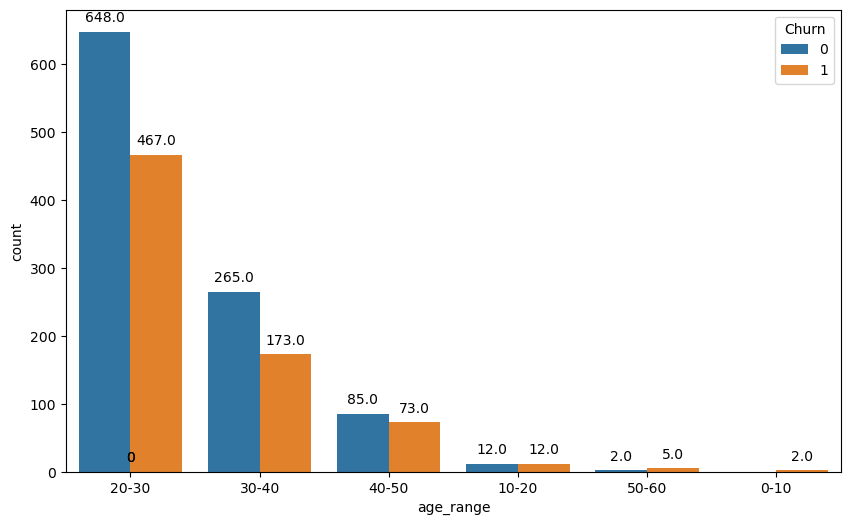

In [9]:
%matplotlib inline

# Create a countplot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age_range', hue='Churn')

# Add counts for each category
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


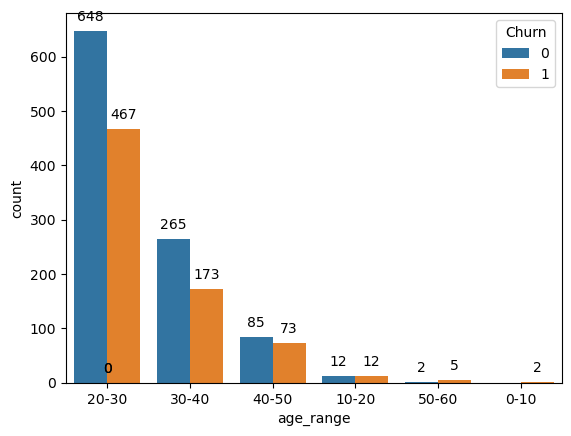

In [10]:
# Aggregate counts of loyal customers (0 and 1) for each age group
loyal_counts = df.groupby(['age_range', 'Churn']).size().reset_index(name='Count')

# Plot the count of loyal customers
sns.countplot(data=df, x='age_range', hue='Churn')

# Display legend with count values
for p in plt.gca().patches:
    height = p.get_height() if not pd.isnull(p.get_height()) else 0
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

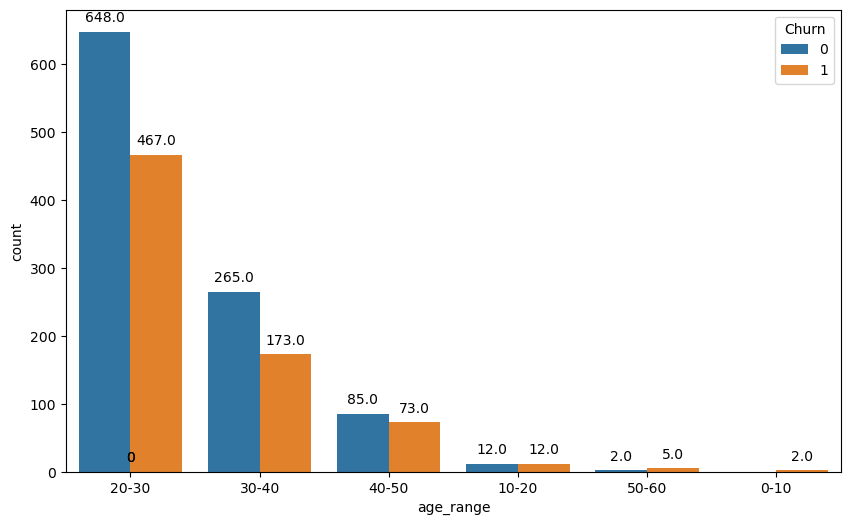

In [11]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age_range', hue='Churn')

# Add counts for each category
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

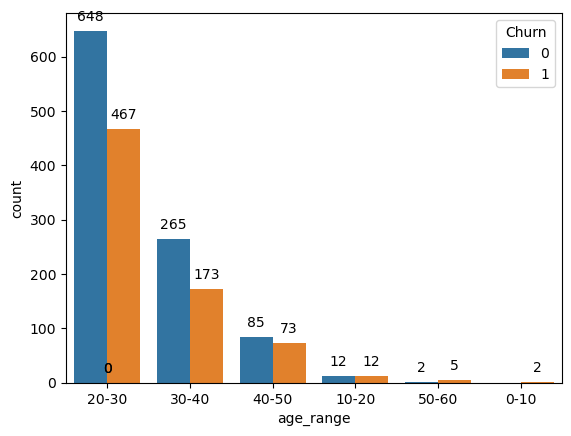

In [12]:
# Aggregate counts of loyal customers (0 and 1) for each age group
loyal_counts = df.groupby(['age_range', 'Churn']).size().reset_index(name='Count')

# Plot the count of loyal customers
sns.countplot(data=df, x='age_range', hue='Churn')

# Display legend with count values
for p in plt.gca().patches:
    height = p.get_height() if not pd.isnull(p.get_height()) else 0
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Plotting based on different features and saving them to Excel.

In [16]:
# Ensure output directories exist
output_dir = '../output/analysis/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming df['LoyalCustomer'] is the target variable
df['Churn'].value_counts()

# Set global bar width
bar_width = 0.8

def plot_categorical(feature, workbook):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    sns.countplot(x=feature, hue='Churn', data=df, ax=ax1)
    ax1.set_ylabel('Count', fontsize=16, fontweight='bold')
    ax1.legend(labels=['Retained', 'Churned'])
    ax1.tick_params(axis='both', labelsize=14)

    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points', 
                      fontsize=14, fontweight='bold')

    churn_rate = df.groupby(feature)['Churn'].mean() * 100
    churn_rate = churn_rate.reset_index()
    sns.barplot(x=feature, y='Churn', data=churn_rate, ax=ax2,
                linewidth=1, saturation=bar_width)
    ax2.set_ylabel('Churn rate (%)', fontsize=16, fontweight='bold')
    ax2.set_xlabel(feature, fontsize=16, fontweight='bold')
    ax2.tick_params(axis='both', labelsize=14)

    for p in ax2.patches:
        ax2.annotate('{:.2f}%'.format(p.get_height()), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points', 
                      fontsize=14, fontweight='bold')

    ax2.set_xticks(range(len(churn_rate[feature])))
    ax2.set_xticklabels(churn_rate[feature], fontsize=14, fontweight='bold')

    plt.tight_layout()

    # Save the figure as an image
    fig_path = os.path.join(output_dir, f'{feature}_plot.png')
    plt.savefig(fig_path, bbox_inches='tight')
    plt.close()

    # Insert the image into the Excel file
    worksheet_name = f'{feature}_Plot'
    worksheet = workbook.create_sheet(title=worksheet_name)
    img = openpyxl.drawing.image.Image(fig_path)
    worksheet.add_image(img, 'A1')

# Create a pandas ExcelWriter object using a context manager
with pd.ExcelWriter(os.path.join(output_dir, 'plots.xlsx'), engine='openpyxl') as excel_writer:
    workbook = excel_writer.book

    num_features = ['PackageValiditydays']
    cat_features = ['age_range', 'Gender', 'HNI Customer', 'Zone', 'Item', 'BusinessUnit', 'TierName',
                'Marketbucket', 'Free', 'AQU', 'status2', 'ExistNewTag', 'FinalAmount',
                'InvoiceCenterCode', 'Promotion', 'Category', 'PackageCode',
                'CenterCode', 'finalInvoiceId', 'month', 'year']

    for feature in cat_features:
        plot_categorical(feature, workbook)


C:\Users\goenk\AppData\Local\Temp\ipykernel_24096\1185228585.py:54: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\goenk\AppData\Local\Temp\ipykernel_24096\1185228585.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\goenk\AppData\Local\Temp\ipykernel_24096\1185228585.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(fig_path, bbox_inches='tight')
